In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
sales = pd.read_csv("/content/drive/MyDrive/Walmart.csv")

DATA OVERVIEW

In [ ]:
sales.shape

(6435, 8)

In [ ]:
sales.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
sales.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [ ]:
sales.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


DATA PREPROCESSING

In [ ]:
sales.isnull().sum()


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
dups = sales.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [ ]:
sales['Date'] = pd.to_datetime(sales['Date'],format='%d-%m-%Y')

sales['Quarter'] = sales['Date'].dt.to_period('Q').dt.quarter

sales

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,1
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,1
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,3
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,4
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,4
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,4


Year

In [ ]:
sales['Date'] = pd.to_datetime(sales['Date'], format='%d-%m-%Y')

sales['Year'] = sales['Date'].dt.year

sales

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,1,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,1,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,1,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,1,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,3,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,4,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,4,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,4,2012


Month

In [ ]:
sales['Date'] = pd.to_datetime(sales['Date'], format='%d-%m-%Y')


sales['Month'] = sales['Date'].dt.month

sales

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,Year,Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,1,2010,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,1,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,1,2010,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,1,2010,3
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,3,2012,9
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,4,2012,10
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,4,2012,10
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,4,2012,10


In [ ]:
sales['Day'] = sales['Date'].dt.day
sales

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,Year,Month,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,1,2010,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,1,2010,2,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,1,2010,2,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,1,2010,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,3,2012,9,28
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,4,2012,10,5
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,4,2012,10,12
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,4,2012,10,19


Week of the Year

In [ ]:
sales['Week_of_Year'] = sales['Date'].dt.isocalendar().week
sales

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,Year,Month,Day,Week_of_Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,1,2010,2,5,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,1,2010,2,12,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1,2010,2,19,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,1,2010,2,26,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,1,2010,3,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,3,2012,9,28,39
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,4,2012,10,5,40
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,4,2012,10,12,41
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,4,2012,10,19,42


In [ ]:
sales['Date'] = pd.to_datetime(sales['Date'], format='%d-%m-%Y')

sales['Store'] = sales['Store'].astype('object')
sales['Quarter'] = sales['Quarter'].astype('object')
sales['Year'] = sales['Year'].astype('object')
sales['Month'] = sales['Month'].astype('object')
sales['Day'] = sales['Day'].astype('object')
sales['Week_of_Year'] = sales['Week_of_Year'].astype('object')
sales['Holiday_Flag'] = sales['Holiday_Flag'].astype('object')

In [ ]:
sales.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Quarter          period[Q-DEC]
Year                     int32
Month                    int32
dtype: object

Assing Name to Holiday date

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12

Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12

In [ ]:
sales['Holiday_Event'] = 'Not Holiday'

In [ ]:
holiday_dates = {'Super Bowl':['2010-02-12', '2011-02-11', '2012-02-10'],
                 'Labor Day': ['2010-09-10', '2011-09-09', '2012-09-07'],
                 'Thanksgiving': ['2010-11-26', '2011-11-25', '2012-11-23'],
                 'Christmas': ['2010-12-31', '2011-12-30', '2012-12-28']}
for holiday, dates in holiday_dates.items():
    sales.loc[sales['Date'].isin(dates), 'Holiday_Event'] = holiday

sales


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,Year,Month,Day,Week_of_Year,Holiday_Event
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,1,2010,2,5,5,Not Holiday
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,1,2010,2,12,6,Super Bowl
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1,2010,2,19,7,Not Holiday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,1,2010,2,26,8,Not Holiday
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,1,2010,3,5,9,Not Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,3,2012,9,28,39,Not Holiday
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,4,2012,10,5,40,Not Holiday
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,4,2012,10,12,41,Not Holiday
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,4,2012,10,19,42,Not Holiday


EXPLONATORY DATA ANALYSIS

Stores with the highest sales

<ipython-input-72-a8a207754c09>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=sorted, x='Store', y='Weekly_Sales',order = sorted['Store'], palette = "Set2")


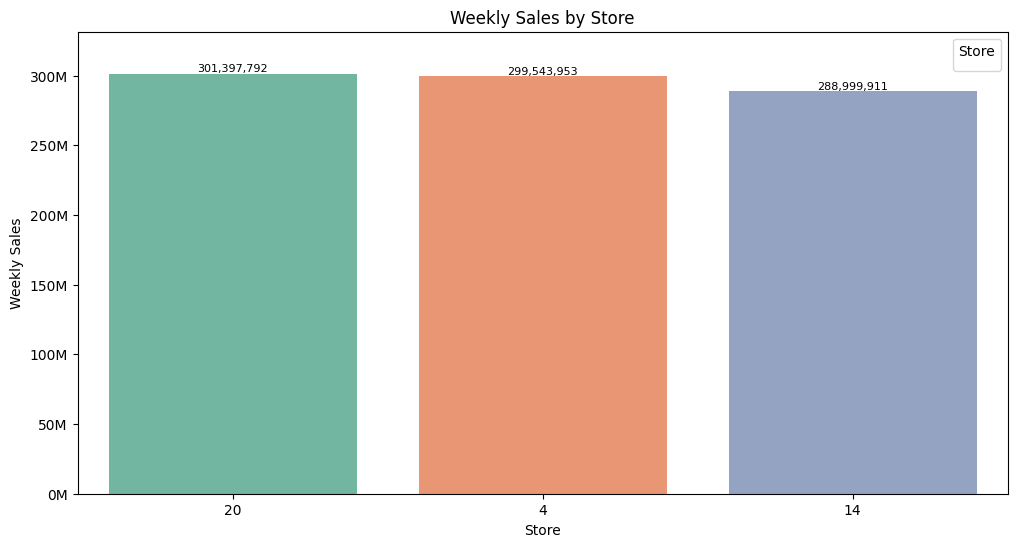

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

agg_sales = sales.groupby('Store')['Weekly_Sales'].sum().reset_index()

sorted = agg_sales.sort_values(by='Weekly_Sales', ascending=False).head(3)

plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=sorted, x='Store', y='Weekly_Sales',order = sorted['Store'], palette = "Set2")
plt.title('Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.legend(title='Store')
plt.grid(False)



y_max = sorted['Weekly_Sales'].max()
plt.ylim(0, y_max * 1.1)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1e6):,}M'))

for bar in barplot.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height):,}',
        ha='center',
        va='bottom',
        fontsize=8,
        color='black'
    )
plt.show()



<ipython-input-76-6d1225405d21>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=sorted, x='Store', y='Weekly_Sales',order = sorted['Store'], palette = "Set3")


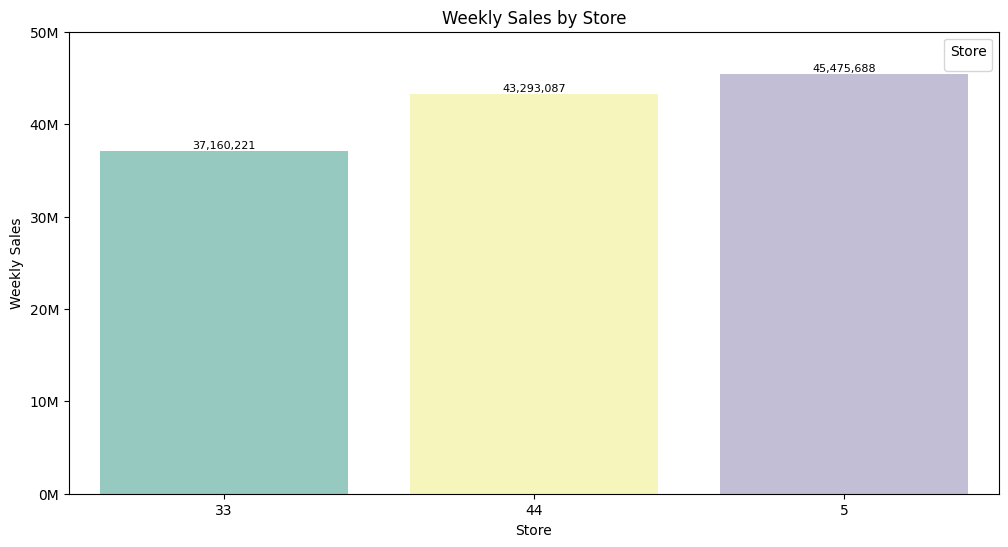

In [ ]:
agg_sales = sales.groupby('Store')['Weekly_Sales'].sum().reset_index()

sorted = agg_sales.sort_values(by='Weekly_Sales', ascending=True).head(3)

plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=sorted, x='Store', y='Weekly_Sales',order = sorted['Store'], palette = "Set3")
plt.title('Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.legend(title='Store')
plt.grid(False)



y_max = sorted['Weekly_Sales'].max()
plt.ylim(0, y_max * 1.1)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1e6):,}M'))

for bar in barplot.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height):,}',
        ha='center',
        va='bottom',
        fontsize=8,
        color='black'
    )
plt.show()



<ipython-input-104-04391512d465>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatterplot = sns.scatterplot(data=store_20, x='Temperature', y='Weekly_Sales', palette="Set1")


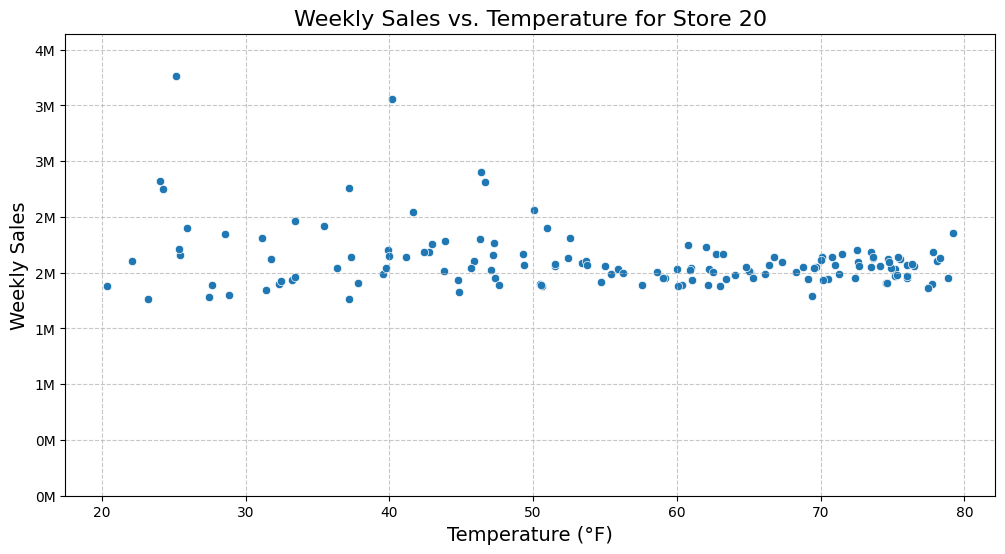

In [ ]:
store_20 = sales[sales['Store'] == 20]

# Create a scatter plot for Weekly_Sales vs. Temperature
plt.figure(figsize=(12, 6))
scatterplot = sns.scatterplot(data=store_20, x='Temperature', y='Weekly_Sales', palette="Set1")

plt.title('Weekly Sales vs. Temperature for Store 20', fontsize=16)
plt.xlabel('Temperature (°F)', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)

# Formatting y-axis
y_max = store_20['Weekly_Sales'].max()
plt.ylim(0, y_max * 1.1)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1e6):,}M'))

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Sales by Year

<ipython-input-163-37f54664870c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=sorted_sales, x='Year', y='Weekly_Sales', palette="Set1", order=sorted_sales['Year'])


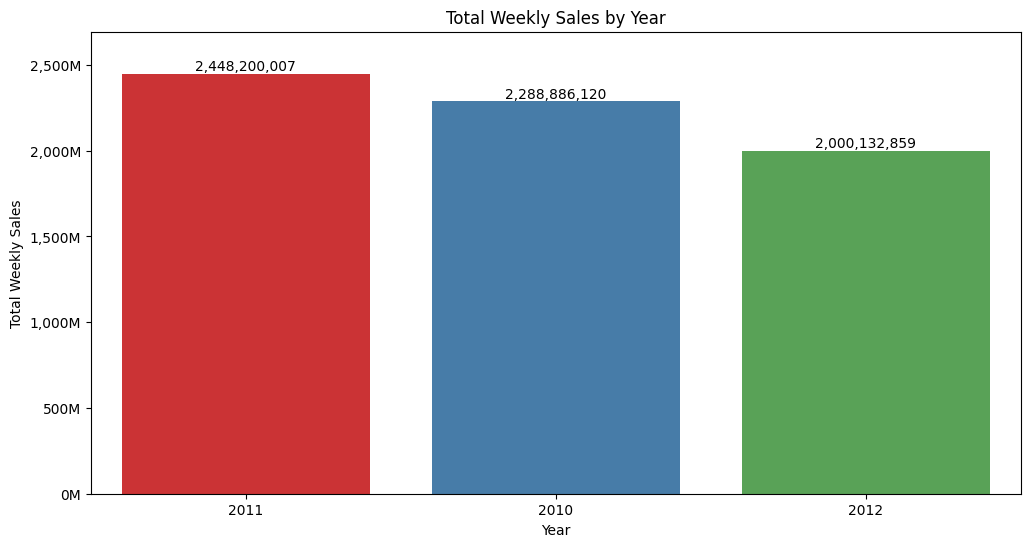

In [ ]:
agg_sales = sales.groupby('Year')['Weekly_Sales'].sum().reset_index()


sorted_sales = agg_sales.sort_values(by='Weekly_Sales', ascending=False)


plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=sorted_sales, x='Year', y='Weekly_Sales', palette="Set1", order=sorted_sales['Year'])


plt.title('Total Weekly Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Weekly Sales')

y_max = sorted_sales['Weekly_Sales'].max()
plt.ylim(0, y_max * 1.1)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1e6):,}M'))

for bar in barplot.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height):,}',
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )
plt.grid(False)
plt.show()

<ipython-input-80-dbf6047e34d5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=sorted_sales, x='Month', y='Weekly_Sales', palette="mako", order=sorted_sales['Month'])


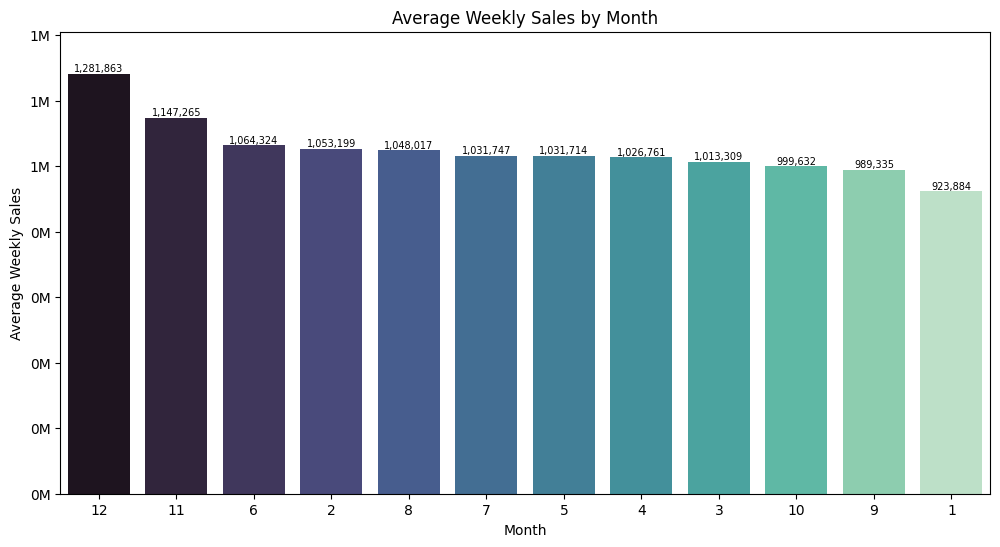

In [ ]:
agg_sales = sales.groupby('Month')['Weekly_Sales'].mean().reset_index()


sorted_sales = agg_sales.sort_values(by='Weekly_Sales', ascending=False)


plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=sorted_sales, x='Month', y='Weekly_Sales', palette="mako", order=sorted_sales['Month'])


plt.title('Average Weekly Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')

y_max = sorted_sales['Weekly_Sales'].max()
plt.ylim(0, y_max * 1.1)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1e6):,}M'))

for bar in barplot.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height):,}',
        ha='center',
        va='bottom',
        fontsize=7,
        color='black'
    )
plt.grid(False)
plt.show()

Sales by Quarter

<ipython-input-82-0e21c914cf64>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=sorted_sales, x='Quarter', y='Weekly_Sales', palette="rocket", order=sorted_sales['Quarter'])


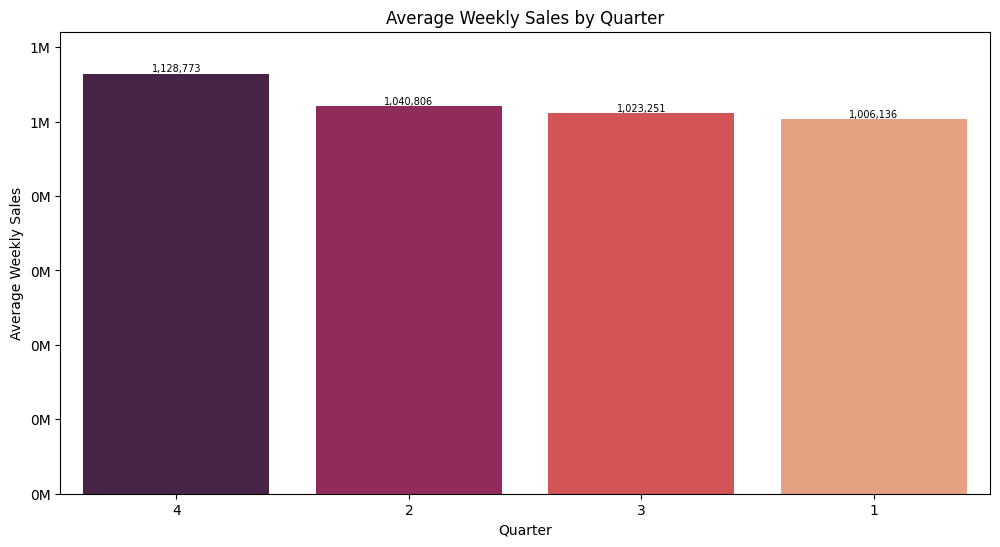

In [ ]:
agg_sales = sales.groupby('Quarter')['Weekly_Sales'].mean().reset_index()


sorted_sales = agg_sales.sort_values(by='Weekly_Sales', ascending=False)


plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=sorted_sales, x='Quarter', y='Weekly_Sales', palette="rocket", order=sorted_sales['Quarter'])


plt.title('Average Weekly Sales by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Weekly Sales')

y_max = sorted_sales['Weekly_Sales'].max()
plt.ylim(0, y_max * 1.1)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1e6):,}M'))

for bar in barplot.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height):,}',
        ha='center',
        va='bottom',
        fontsize=7,
        color='black'
    )
plt.grid(False)
plt.show()

Sales by Holiday

<ipython-input-105-af92efec18f8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=sorted_sales, x='Holiday_Event', y='Weekly_Sales', palette="Set1", order=sorted_sales['Holiday_Event'])


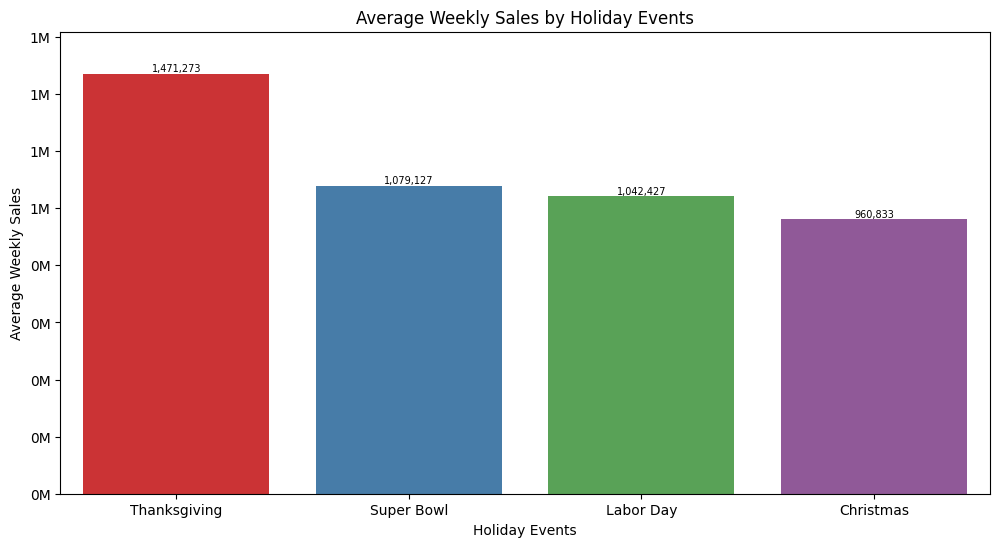

In [ ]:
holiday_sales = sales[sales['Holiday_Event'] != 'Not Holiday']


agg_sales = holiday_sales.groupby('Holiday_Event')['Weekly_Sales'].mean().reset_index()


sorted_sales = agg_sales.sort_values(by='Weekly_Sales', ascending=False)


plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=sorted_sales, x='Holiday_Event', y='Weekly_Sales', palette="Set1", order=sorted_sales['Holiday_Event'])


plt.title('Average Weekly Sales by Holiday Events')
plt.xlabel('Holiday Events')
plt.ylabel('Average Weekly Sales')


y_max = sorted_sales['Weekly_Sales'].max()
plt.ylim(0, y_max * 1.1)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1e6):,}M'))


for bar in barplot.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height):,}',
        ha='center',
        va='bottom',
        fontsize=7,
        color='black'
    )

plt.grid(False)
plt.show()

In [ ]:
sales.dtypes

Store                     int64
Date             datetime64[ns]
Weekly_Sales            float64
Holiday_Flag              int64
Temperature             float64
Fuel_Price              float64
CPI                     float64
Unemployment            float64
Quarter                   int64
Year                      int32
Month                     int32
Day                       int32
Week_of_Year             UInt32
Holiday_Event            object
dtype: object

In [ ]:
# from sklearn.preprocessing import StandardScaler

# numeric_cols = [
#   'Temperature',
#   'Fuel_Price',
#   'CPI',
#   'Unemployment']
# scaler = StandardScaler()

# # Fit and transform the numeric columns
# sales[numeric_cols] = scaler.fit_transform(sales[numeric_cols])




Encode

In [ ]:


holiday_dummies = pd.get_dummies(sales['Holiday_Event'], drop_first=False)
holiday_dummies = holiday_dummies.astype(int)

# Drop the original 'Holiday_Event' column
sales = sales.drop('Holiday_Event', axis=1)

# Combine the dummy variables with the rest of the DataFrame
sales = pd.concat([sales, holiday_dummies], axis=1)


In [ ]:
sales = sales.drop('Date', axis=1)
sales

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,Year,Month,Day,Week_of_Year,Christmas,Labor Day,Not Holiday,Super Bowl,Thanksgiving
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,1,2010,2,5,5,0,0,1,0,0
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,1,2010,2,12,6,0,0,0,1,0
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,1,2010,2,19,7,0,0,1,0,0
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,1,2010,2,26,8,0,0,1,0,0
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,1,2010,3,5,9,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,3,2012,9,28,39,0,0,1,0,0
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,4,2012,10,5,40,0,0,1,0,0
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,4,2012,10,12,41,0,0,1,0,0
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,4,2012,10,19,42,0,0,1,0,0


In [ ]:
sales.dtypes

Store                   object
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag            object
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Year                    object
Quarter                 object
Month                   object
Day                     object
Week_of_Year            object
Christmas                int64
Labor Day                int64
Not Holiday              int64
Super Bowl               int64
Thanksgiving             int64
dtype: object

In [ ]:
predictors = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
              'Quarter', 'Year', 'Month', 'Day', 'Week_of_Year', 'Christmas', 'Labor Day',
              'Not Holiday', 'Super Bowl', 'Thanksgiving']


X = sales[predictors]

In [ ]:
X

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,Year,Month,Day,Week_of_Year,Christmas,Labor Day,Not Holiday,Super Bowl,Thanksgiving
0,1,0,-0.995136,-1.713800,1.004175,0.056964,1,2010,2,5,5,0,0,1,0,0
1,1,1,-1.201170,-1.766089,1.007880,0.056964,1,2010,2,12,6,0,0,0,1,0
2,1,0,-1.124178,-1.840166,1.009074,0.056964,1,2010,2,19,7,0,0,1,0,0
3,1,0,-0.760907,-1.737766,1.009849,0.056964,1,2010,2,26,8,0,0,1,0,0
4,1,0,-0.767955,-1.598328,1.010624,0.056964,1,2010,3,5,9,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,0,0.228602,1.390883,0.519270,0.365109,3,2012,9,28,39,0,0,1,0,0
6431,45,0,0.229144,1.364738,0.523256,0.356046,4,2012,10,5,40,0,0,1,0,0
6432,45,0,-0.335825,1.397419,0.527241,0.356046,4,2012,10,12,41,0,0,1,0,0
6433,45,0,-0.227385,1.329879,0.527332,0.356046,4,2012,10,19,42,0,0,1,0,0


In [ ]:
y = sales['Weekly_Sales']

In [ ]:
import numpy as np
import random

np.random.seed(0)
random.seed(0)

Split data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                      random_state=0)

Decision Tree Regressor for continuous variable

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=0)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


# print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R-squared: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")



Root Mean Squared Error (RMSE): 133052.787
R-squared: 0.944
Mean Absolute Error (MAE): 68778.562


In [ ]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Show full content of each column

In [ ]:
importance = pd.DataFrame(tree_pruned.feature_importances_, index = X.columns, columns = ["Importance"])
importance.sort_values(by = "Importance", ascending = False)

,Importance
Store,0.73
CPI,0.14
Unemployment,0.06
Week_of_Year,0.04
Day,0.01
Temperature,0.01
Month,0.00
Fuel_Price,0.00
Christmas,0.00
Thanksgiving,0.00


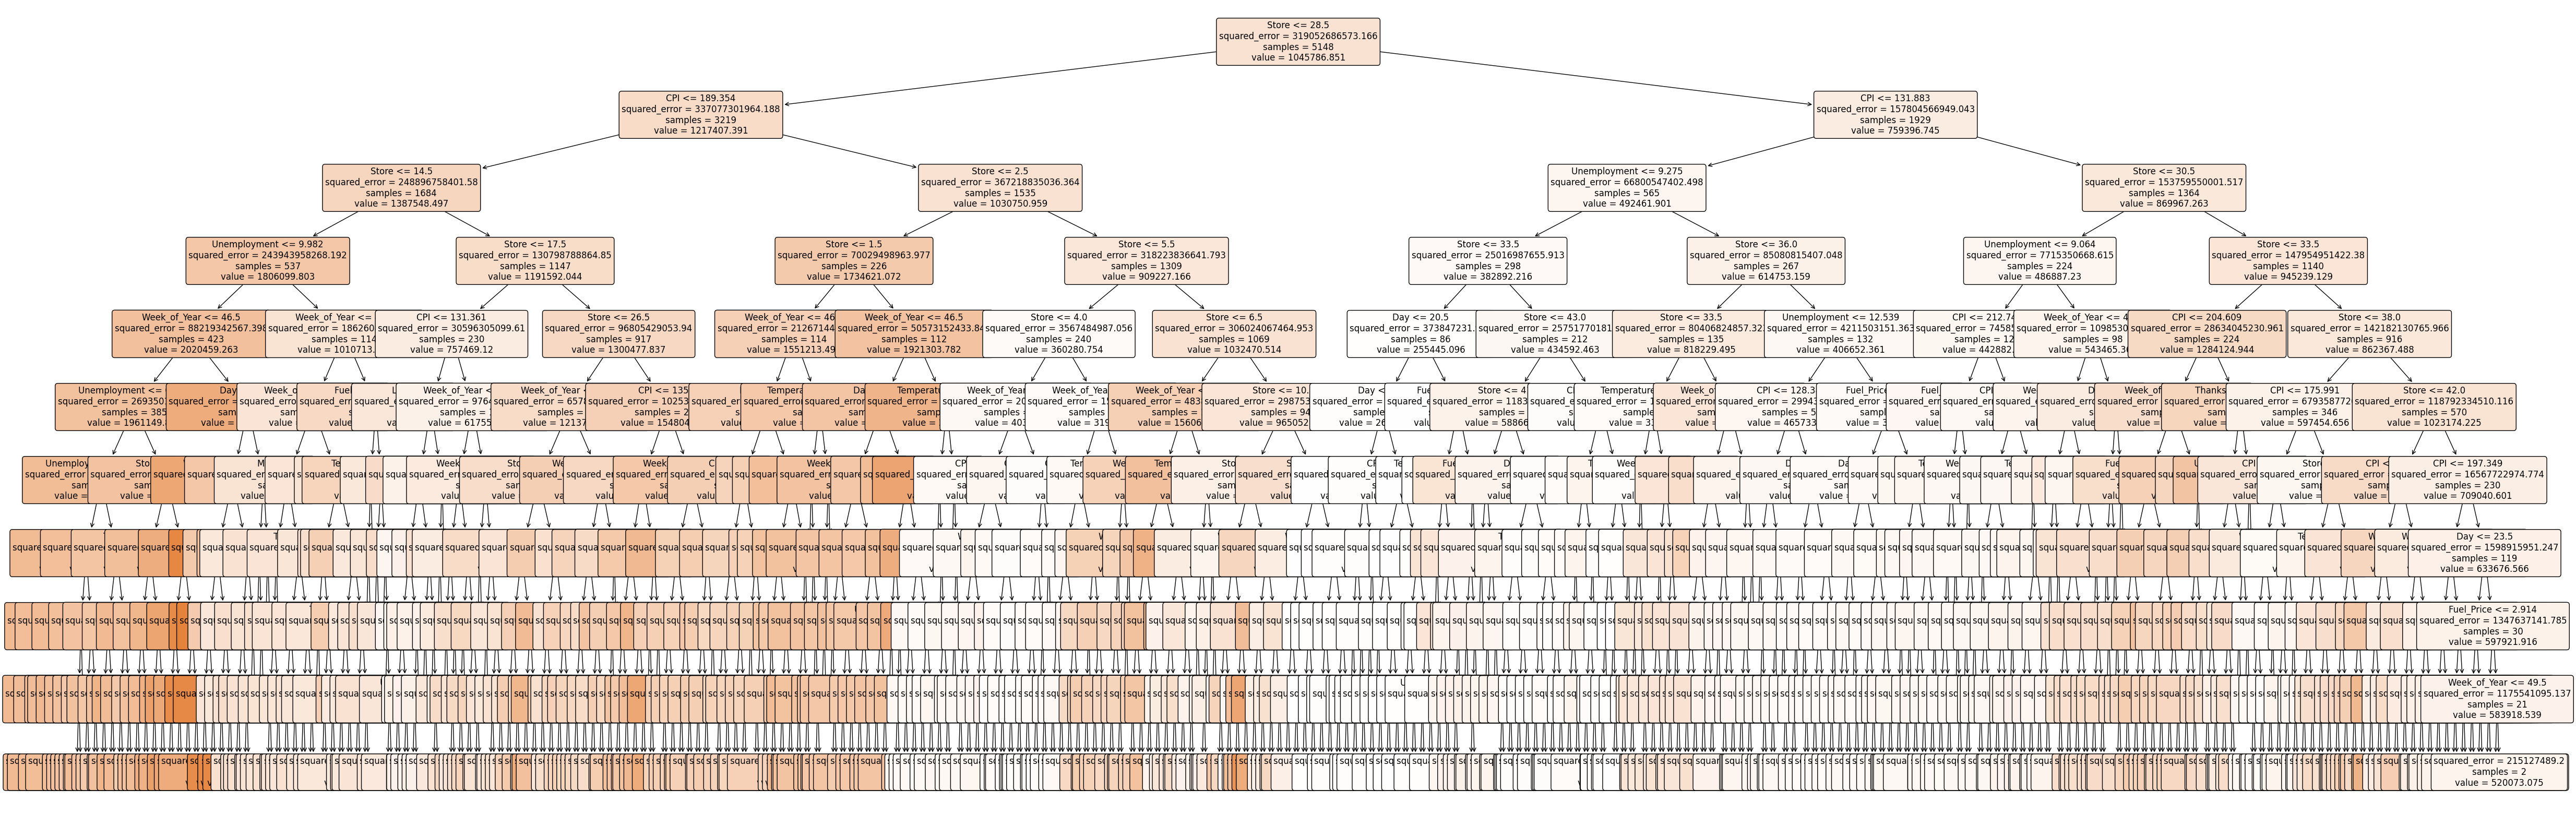

In [ ]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(60,20))  # Adjust size for better visibility
plot_tree(tree_pruned,
          feature_names=X_train.columns,  # Use X_train.columns if X is your feature matrix
          filled=True,
          rounded=True,
          fontsize=12)  # Adjust fontsize if needed

plt.show()

GRID SEARCH FOR DECISION TREE

In [ ]:
tree = DecisionTreeRegressor(random_state=0)
tree.get_params()


{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [ ]:

from sklearn.model_selection import GridSearchCV


param_grid = {
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt','log2']
}


# grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5,
#                            scoring='neg_mean_squared_error', return_train_score=True)


grid_search = GridSearchCV(estimator=tree, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_

best_dtree_reg = grid_search.best_estimator_
y_pruned_pred = best_dtree_reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pruned_pred)
mse = mean_squared_error(y_test, y_pruned_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pruned_pred)


print(f"Best parameters: {best_params}")
# print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R-squared: {r2:.3f}")







Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Mean Squared Error (MSE): 13429700518.803
Root Mean Squared Error (RMSE): 115886.585
R-squared: 0.958
Mean Absolute Error (MAE): 65029.529
Mean Absolute Percentage Error (MAPE): 5.951%


In [ ]:
results_df = pd.DataFrame({'Actual Sales': y_test, 'Predicted Sales': y_pruned_pred})


print(results_df.head(10).to_string(index=False))


 Actual Sales  Predicted Sales
   1220984.94       1161190.21
   1246322.44       1196831.47
    505918.21        465151.06
    527572.25        548925.80
    719235.07        731127.04
    902779.25        932672.36
    648652.01        753176.66
   1392395.20       1390162.35
   1235163.86       1136627.05
    534285.21        515917.00


RANDOM FOREST


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize and fit the model
forest = RandomForestRegressor(random_state = 0)
forest.fit(X_train, y_train)

# Make predictions
y_rf_pred = forest.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_rf_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_rf_pred)
mae = mean_absolute_error(y_test, y_rf_pred)


# print(f"Random Forest Mean Squared Error (MSE): {mse:.3f}")
print(f"Random Forest Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Random Forest R-squared: {r2:.3f}")
print(f"Random Forest Mean Absolute Error (MAE): {mae:.3f}")




Random Forest Mean Squared Error (RMSE): 104114.229
Random Forest R-squared: 0.966
Random Forest Mean Absolute Error (MAE): 52670.605
Random Forest Mean Absolute Percentage Error (MAPE): 4.779%


In [ ]:
importances = forest.feature_importances_

df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
df = df.sort_values('Importance', ascending = False)
df



,Feature,Importance
0,Store,0.67
4,CPI,0.16
5,Unemployment,0.10
10,Week_of_Year,0.04
9,Day,0.01
2,Temperature,0.01
3,Fuel_Price,0.01
8,Month,0.00
15,Thanksgiving,0.00
11,Christmas,0.00


GRID SEARCH FOR RANDOM FOREST

In [ ]:
# Fine-Tune model using GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error

param_grid = [
    {'n_estimators': [3, 10, 30, 45, 60], 'max_features': [2, 4, 6, 8]}
]
scoring = make_scorer(mean_absolute_error, greater_is_better=False)

forest_reg = RandomForestRegressor(random_state =0)
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5,
                           scoring = scoring,
                           return_train_score = True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 45, 60]}],
             return_train_score=True,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [ ]:
# Best parameters
print("Best parameters found: ", grid_search.best_params_)



# Get the best model
best_forest_reg = grid_search.best_estimator_

# Make predictions with the best model
y_best_pred = best_forest_reg.predict(X_test)



mse_best = mean_squared_error(y_test, y_best_pred)
rmse_best = mse_best**0.5
r2_best = r2_score(y_test, y_best_pred)
mae_best = mean_absolute_error(y_test, y_best_pred)


# print(f"Best Random Forest Mean Squared Error (MSE): {mse_best:.3f}")
print(f"Best Random Forest Root Mean Squared Error (RMSE): {rmse_best:.3f}")
print(f"Best Random Forest R-squared: {r2_best:.3f}")
print(f"Best Random Forest Mean Absolute Error: {mae_best:.3f}")



Best parameters found:  {'max_features': 8, 'n_estimators': 60}
Best Random Forest Root Mean Squared Error (RMSE): 99464.374
Best Random Forest R-squared: 0.969
Best Random Forest Mean Absolute Error: 54694.767
Mean Absolute Percentage Error (MAPE): 5.412%


In [ ]:
results_df = pd.DataFrame({'Actual Sales': y_test, 'Predicted Sales': y_best_pred})

# Display the DataFrame

print(results_df.head(10).to_string(index=False))



 Actual Sales  Predicted Sales
   1220984.94       1203422.84
   1246322.44       1202701.25
    505918.21        494909.05
    527572.25        540305.37
    719235.07        791436.07
    902779.25        921019.27
    648652.01        791082.56
   1392395.20       1345227.45
   1235163.86       1211070.76
    534285.21        553940.98
